In [1]:
import sys
print(sys.executable)

# Loading libraries and dataset

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.style.use("ggplot")

### Dataset

Obtained from [UCI Machine learning repository - Congressional Voting Records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

In [4]:
f1 = open("data/Index")
for i in f1.readlines():
    print(i)

Index of voting-records



02 Dec 1996      135 Index

30 Jun 1993     6868 house-votes-84.names

30 May 1989    18171 house-votes-84.data



In [5]:
f2 = open("data/house-votes-84.names")
for i in f2.readlines()[:57]:
    print(i)

1. Title: 1984 United States Congressional Voting Records Database



2. Source Information:

    (a) Source:  Congressional Quarterly Almanac, 98th Congress, 

                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 

                 Washington, D.C., 1985.

    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)

    (c) Date: 27 April 1987 



3. Past Usage

   - Publications

     1. Schlimmer, J. C. (1987).  Concept acquisition through 

        representational adjustment.  Doctoral dissertation, Department of 

        Information and Computer Science, University of California, Irvine, CA.

        -- Results: about 90%-95% accuracy appears to be STAGGER's asymptote

     - Predicted attribute: party affiliation (2 classes)



4. Relevant Information:

      This data set includes votes for each of the U.S. House of

      Representatives Congressmen on the 16 key votes identified by the

      CQA.  The CQA lists nine different types of votes: vote

In [6]:
names = ["party", "infants", "water", 
         "budget", "physician",
         "salvador", "religious", "satellite",
         "aid", "missile", "immigration", 
         "synfuels", "education", 
         "superfund", "crime", "exports",
         "eaa_sa"]

In [7]:
data = pd.read_csv("data/house-votes-84.data", names = names)
data.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,exports,eaa_sa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Data preprocessing

In [8]:
dr = {
    '?':np.nan,
    'y':1,
    'n':0
}

In [9]:
for i in range(1,17):
    data.iloc[:,i].replace(dr, regex=False, inplace = True)
    data.iloc[:,i] = data.iloc[:,i].astype("Int64", errors = 'ignore')

In [10]:
data.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,exports,eaa_sa
0,republican,0,1,0,1,1,1,0,0,0,1,<NA>,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,<NA>
2,democrat,<NA>,1,1,<NA>,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,<NA>,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,<NA>,1,1,1,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   party        435 non-null    object
 1   infants      423 non-null    Int64 
 2   water        387 non-null    Int64 
 3   budget       424 non-null    Int64 
 4   physician    424 non-null    Int64 
 5   salvador     420 non-null    Int64 
 6   religious    424 non-null    Int64 
 7   satellite    421 non-null    Int64 
 8   aid          420 non-null    Int64 
 9   missile      413 non-null    Int64 
 10  immigration  428 non-null    Int64 
 11  synfuels     414 non-null    Int64 
 12  education    404 non-null    Int64 
 13  superfund    410 non-null    Int64 
 14  crime        418 non-null    Int64 
 15  exports      407 non-null    Int64 
 16  eaa_sa       331 non-null    Int64 
dtypes: Int64(16), object(1)
memory usage: 64.7+ KB


In [12]:
data.isnull().sum()

party            0
infants         12
water           48
budget          11
physician       11
salvador        15
religious       11
satellite       14
aid             15
missile         22
immigration      7
synfuels        21
education       31
superfund       25
crime           17
exports         28
eaa_sa         104
dtype: int64

In [13]:
data = data.fillna(0)

## Exploratory data analyis 

In [14]:
data.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,exports,eaa_sa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


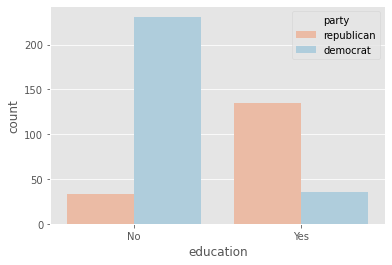

In [15]:
plt.figure()
sns.countplot(x='education', hue='party', data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

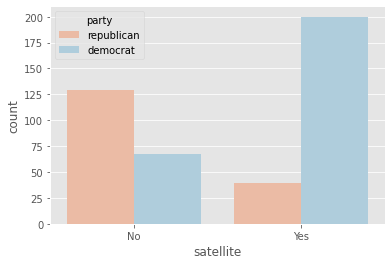

In [16]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

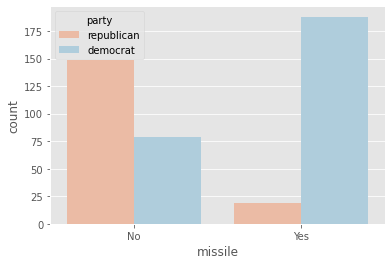

In [17]:
plt.figure()
sns.countplot(x='missile', hue='party', data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

## Building KNN classifier 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=193, stratify = y)

Hyperparamete tuning to find the best value of k 

In [21]:
scores = {}
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
scores_values = [x for x in scores.values()]

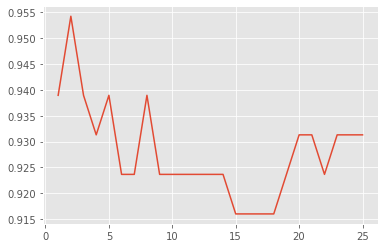

In [22]:
plt.clf()
plt.plot(k_range,scores_values)

Using k = 8 

In [23]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy of model: {}%".format(round(score*100,2)))

Accuracy of model: 93.89%
